# 1) Optimizing Resource Placement for Combating Fentanyl Overdose in San Diego

# 2) Team Members
- Devin Pham (A17198936)
- Josh Puray (A16488499)


# 3) Questions we addressed

In this project, we will be addressing three main questions: 
- Where to place Fentanyl treatment facilities?
- Where to place Fentanyl treatment antagonists (Naloxone)?

Since our first project proposal, we’ve decided to change the wording of our second question from “treatment resources” to “treatment antagonists” to better encapsulate the types of resources that are available.

From 2018 to 2022, San Diego saw an 800% increase in fentanyl overdose deaths. This exponential growth is alarming, and we must do what we can to address this crisis. Additionally, Fentanyl overdose was the number 1 cause of death among the homeless with 181 lives lost in 2022 (City of San Diego). Our questions are important because they help improve access to life-saving treatments for individuals struggling with Fentanyl addiction or overdose. As the number 1 cause of death among the homeless, our questions will help our most vulnerable population get the help they need to regain stability.

This project is intended for public health officials who are responsible for the allocation of Fentanyl facilities and resource locations in San Diego. We must optimize the allocation of Fentanyl treatment resources as a timely treatment, especially in the case of an emergency, is crucial. 


# 4) Background and literature

Title: **San Diego Overdose Quarterly Report 2021**

This document presents a quarterly analysis of overdose incidents in San Diego County for the year 2021. Using the report, we gained insights into the areas within San Diego most impacted by overdoses and identified the demographics most vulnerable to such occurrences. Utilizing this report facilitated our understanding of the locations likely to experience the highest rates of fentanyl overdose deaths.

Link: https://www.sandiegocounty.gov/content/dam/sdc/hhsa/programs/phs/od2a/Overdose%20Quarterly%20Report_April%202023.pdf 

Title:**San Diego’s First Naloxone Vending Machine: A Lifesaving Innovation**

Using the following reference, we learned that Naloxone vending machines are a new development in San Diego with the first vending machine being installed in Chula Vista, CA on November 27, 2023. Which inspired us to look for areas where these new up and coming resources can be placed to best figt against Fentanly overdose.

Link: https://soarr.org/san-diegos-first-naloxone-vending-machine-a-lifesaving-innovation/

Title: **San Diego's Naloxone Distribution Program**

The San Diego Naloxone Distribution Program (NDP) is responsible for distributing Naloxone kits across the county. Since the launch of the program, NDP has allocated 33,160 naloxone kits and placed a total of 12 vending machines. This reference also tells us that these vending machines and distribution centers are intended for the community to get their hands on Naloxone ahead of time and not for immediate access. San Diego County recommends dialing 9-1-1 in the case of an emergency. Using this information, we have decided to focus on Naloxone vending machine allocation solely on places with high overdose fatalities.

Link: https://www.sandiegocounty.gov/hhsa/programs/phs/od2a/naloxone.html#distribution

Title: **CA Bridge**

We did not know what CA Bridge was initially, but using the following reference, we were able to understand their necessity in Fentanyl overdose treatment. CA Bridge guarantees that everyone is able to access healthcare even if they are unable to pay. This is highly beneficial for disadvantaged communities such as the homeless community in San Diego who are unable to access traditional healthcare.

Link: https://bridgetotreatment.org/about/

# 5) Python packages used

**Pandas**:

    We used pd to read in our CSV files. We set the option ‘display.max_columns’ 
    so that we could better understand our data when we were querying during our EDA.

**Geopandas**:
    
    We used the GeoPandas package so that we can read in our Zip Code shapefile 
    and perform exploratory data analysis. 
    
**MatPlotLib & Seaborn**:
    
    For exploratory data analysis and to create bar charts. 
    
**IPython**:
    
    To display location allocation results on a map.

**ArcGIS Packages**:

    GIS: To access data in ArcGIS and API
    network: To perform location allocation
    analysis: To perform spatial joins between feature layers
    features: To manipulate different features for the analysis
    
We used these ArcGIS packages to get our feature layers, work with spatial data, and perform spatial analysis. These packages were the most important as they were primarily used for our location allocation analysis. 

This list has not evolved when compared to our original proposal as we maintained the same methods to do location allocation analysis on additional zip codes.

In [29]:
import pandas as pd
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
from IPython.display import display


# Removes warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


from arcgis.gis import GIS
import arcgis.network as network
from arcgis.features import analysis
from arcgis import features 

In [2]:
# To access GIS api
gis = GIS("https://ucsdonline.maps.arcgis.com/home", client_id="IWzNYKfUPUayU1hD")

Please sign in to your GIS and paste the code that is obtained below.
If a web browser does not automatically open, please navigate to the URL below yourself instead.
Opening web browser to navigate to: https://ucsdonline.maps.arcgis.com/sharing/rest/oauth2/authorize?response_type=code&client_id=IWzNYKfUPUayU1hD&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&state=9cuAL2QphHZTEzK89t4oTW79ZPIR0S&allow_verification=false
Enter code obtained on signing in using SAML: ········


/opt/conda/lib/python3.9/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ucsdonline.maps.arcgis.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


# 6) Data Sources

1. Medical examiner data containing Opioid-related deaths in San Diego, CA 
    URL: https://data.sandiegocounty.gov/Safety/Medical-Examiner-Cases/jkvb-n4p7/about_data

    This dataset was provided to us directly from the San Diego County Sheriff's Department containing 3000+ records. We chose to filter by “Opioid-Fentanyl” and “Not A Suicide” using the website’s built-in filtering tool in order to do more targeted research. Because the data was recorded from 1997-2023, we were able to get the full context of the Fentanyl situation in San Diego County. 

2. Zip codes within San Diego County.
    URL: https://data.sandiegocounty.gov/Maps-and-Geographical-Resources/Zip-Codes/vsuf-uefy
    ID: "ea950437eb5046daaf13082d8c001da4"

    We had no concerns about this dataset because it came straight from the County. Plotting the shapefile using GeoPandas gave us the perfect representation of San Diego County. 

3. This dataset is population by zip code within San Diego County.
    URL: https://www.census.gov/programs-surveys/decennial-census/about/rdo.html

    We couldn’t find a data source that contained all of the populations by zip codes in San Diego county so we made our own dataset using queries from the Census. The only concern here is human error, but we made sure to make careful data entry. We eventually used this dataset for normalization.

4. SANDAG San Diego County Existing Locations Data
    URL: https://rdw.sandag.org/Account/gisdtview?dir=Land%20Use
    ID: "69fb5a9d3c594733a0e62544542a7e9f"
   
    This is the SANDAG Land Use data which we’ve used to find candidate resource locations by doing a spatial join with self-administered treatment locations. This dataset was last updated in 2022 which we believe is up-to-date assuming LU codes change infrequently. You can use the following pdf to find the description of each LU Code (Land Use Code):
https://www.sandag.org/-/media/SANDAG/Documents/PDF/regional-plan/sustainable-growth-and-development/land-use/land-use-codes-2022.pdf

5. Opioid Prevention, Safe Disposal and Treatment Resource Map
    URL: https://ucsdonline.maps.arcgis.com/apps/mapviewer/index.html?webmap=69cf1bea508f4fb5a10d4075c1c36fc6
    ID: "c227f271096e4dcea3b465e5f7ef57d3" (Vending Machines),
    “2d492ec4f078454b8f8e1b2fa20c498c” (Distribution Centers)

    This feature layer contains CA Bridge Hospitals, Naloxone Vending Machines and Distribution Locations, and Medication Assisted Treatment Centers. These feature layers were created on Oct 23, 2023 so it is relatively up-to-date. For our purpose, we will only be using  the Naloxone vending machines layer and Naloxone distribution centers layers. 

    We did not find additional data sources as the resource map we found was already suitable for our location allocation analysis.


## Loading in Data

In [3]:
# import csv data
deaths = gis.content.get("14ba9d24c6aa4c17bd28967101fa7207").tables[0].query().sdf
deaths['Event_Zip'] = deaths['Event_Zip'].astype('str')
zip_population = gis.content.get("4d4f6e8f6464426b827ef07e2232b71b").tables[0].query().sdf
zip_population["Zip_Code"] = zip_population["Zip_Code"].astype('str')


# import ArcGIS data
land_use_id = "69fb5a9d3c594733a0e62544542a7e9f"
zips_id = "ea950437eb5046daaf13082d8c001da4"

land_use_fl = gis.content.get(land_use_id)
zips_fl = gis.content.get(zips_id)

# 7) Data cleaning 

The opioid prevention map features four layers of interest: CA Bridge Hospitals, Naloxone Vending Machines, Distribution Locations, and Medication Assisted Treatment Centers. For our analysis, we categorized these layers into two groups: Naloxone distribution locations and healthcare facilities, outlined as follows:
- **Naloxone distribution locations:**
    - Naloxone Vending Machines
    - Naloxone Distribution Site
- **Healthcare facilities:**
    - CA Bridge Hospitals 
    - Medication Assisted Treatment Centers 
    
After categorizing the data, we proceeded to aggregate the layers into their respective groups.

<Item title:"San Diego: Naloxone Distribution Locations" type:Feature Layer Collection owner:jpuray_UCSDOnline>
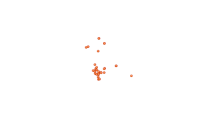

In [4]:
# Merging Naloxone distribution locations into one feature layer 

# Read in each layer
vending_machines = gis.content.get("c227f271096e4dcea3b465e5f7ef57d3").layers[0]
naloxone_sites = gis.content.get('11b3e21849b94101b5f761a10282b83b').layers[0]

# Query each layer into a sdf 
vending_machines_sdf = vending_machines.query().sdf[['ObjectID','SHAPE']]
vending_machines_sdf['Type'] = 'Vending Machine'
naloxone_sites_sdf = naloxone_sites.query().sdf[['ObjectID','SHAPE']]
naloxone_sites_sdf['Type'] = 'Naloxone Site'

# Concat them together 
naloxone_distribution = pd.concat([vending_machines_sdf, naloxone_sites_sdf])
naloxone_distribution.spatial.geometry = naloxone_distribution['SHAPE']

# # Save as feature layer
# naloxone_distribution.spatial.to_featurelayer(service={"featureServiceId":"Naloxone Locations", "layer":0})

naloxone_distribution_locations = gis.content.get("2d492ec4f078454b8f8e1b2fa20c498c")
naloxone_distribution_locations

<Item title:"SD Fentanly Treatment Centers and Hospitals" type:Feature Layer Collection owner:jpuray_UCSDOnline>
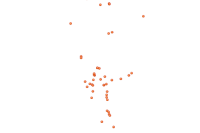

In [5]:
# Merging Healthcare Facilities into one feature layer 

# Read in each layer
hospitals = gis.content.get("17e3d9f99ae042d48137f50e6f644697").layers[0]
centers = gis.content.get('ddcf731782494db0b39f87695833262f').layers[0]

# Query each layer into a sdf 
hospitals_sdf = hospitals.query().sdf[['ObjectID','SHAPE']]
hospitals_sdf['Type'] = 'Hospital'
centers_sdf = centers.query().sdf[['ObjectID','SHAPE']]
centers_sdf['Type'] = 'Treatment Center'

# Concat them together 
hospitals_centers = pd.concat([hospitals_sdf, centers_sdf])
hospitals_centers.spatial.geometry = hospitals_centers['SHAPE']

# # Save as feature layer
# hospitals_centers.spatial.to_featurelayer(service={"featureServiceId":"hospitals_centers", "layer":0})

hospitals_treatment_locations = gis.content.get("dd67aa51f0904bbab40adf37410682ee")
hospitals_treatment_locations

# 8) Descriptive Statistics for the Data 

## a) Which groups are most affected by Fentanyl Overdose?

We plotted the number of Fentanyl Overdoses per year in San Diego County to see how much the Fentanyl Overdose by has increased over the years.

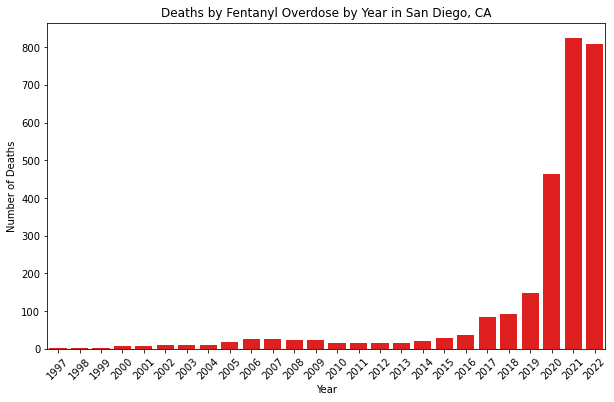

In [6]:
df = deaths.groupby('Year').size()[:-1].reset_index()
df.columns = ['Year', 'Count']

plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='Count', data=df, color='red')
plt.title('Deaths by Fentanyl Overdose by Year in San Diego, CA')
plt.xlabel('Year')
plt.ylabel('Number of Deaths')
plt.xticks(rotation=45)
plt.show()

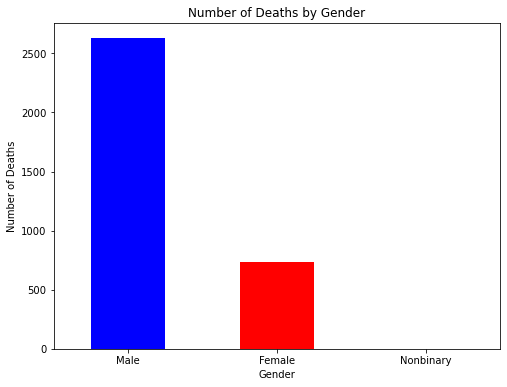

In [7]:
# Count the number of deaths by gender
death_counts = deaths['Gender'].value_counts()

# Plotting
plt.figure(figsize=(8, 6))
death_counts.plot(kind='bar', color=['blue', 'red'])
plt.title('Number of Deaths by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Deaths')
plt.xticks(rotation=0)
plt.show()

We noticed a very concerning increase especially from 2018 to 2022, an almost 1000% increase. This demonstrated the urgency of this Fentanyl-Opioid Crisis, and how we must make careful decisions to allocate our treatment distribution centers and facilities.

We also wanted to observe the number of deaths by Gender as we were curious to see how the Fentanyl-Opioid Crisis affected various demographics.

We observed the male population to have significantly more Fentanyl-related deaths. Observing why this is the case is outside the scope of our project but we infer that this may be due to various factors such as differences in risk-taking behavior and/or mental health. Further research on the gender disparity in Fentanyl-related deaths is needed to gain more insights into the underlying reasons why the male population have significantly more Fentanyl-related deaths.
We then plotted the age groups of deaths to see which age group was affected. We were provided three age group options, but eventually chose age group 1 which had 10 ages per bin since it was the simplest

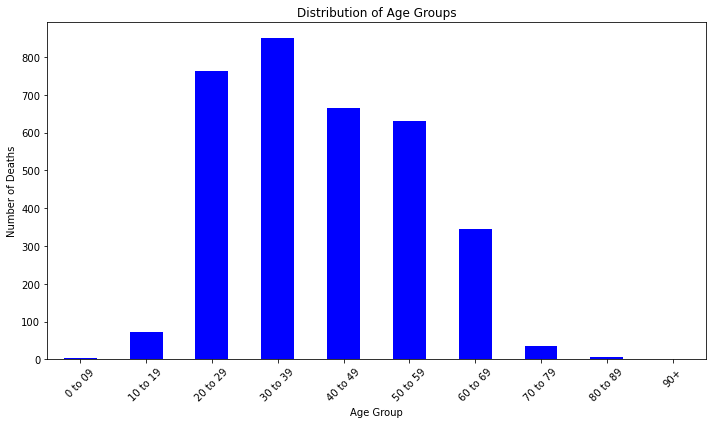

In [8]:
# Count the occurrences of each age group
age_group_counts = deaths['Age_Group_Option_1'].value_counts()

# Sort age groups by converting index to categorical type and sorting
age_order = ['0 to 09', '10 to 19', '20 to 29', '30 to 39', '40 to 49', '50 to 59', '60 to 69', '70 to 79', '80 to 89', '90+']
age_group_counts = age_group_counts.reindex(age_order)

# Plotting
plt.figure(figsize=(10, 6))
age_group_counts.plot(kind='bar', color='blue')
plt.title('Distribution of Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Number of Deaths')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

Plotting age groups, we can see that young adults are the most likely to have a Fentanyl-related death in San Diego County. This information tells us that we should allocate Naloxone distribution and treatment centers in places that young adults common access such as Universities.

We also used a bar plot to see which races are affected by Fentanyl-related deaths in San Diego County.

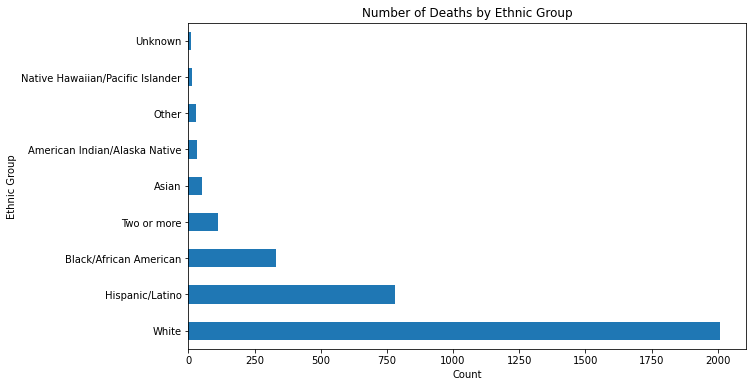

In [9]:
value_counts = deaths['Ethnic_Group__Standardized_'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
value_counts.plot(kind='barh')
plt.xlabel('Count')
plt.ylabel('Ethnic Group')
plt.title('Number of Deaths by Ethnic Group')
plt.show()

Fentanyl can be seen to affect Caucasians the most. This information will be useful in the future for targetted intervention.


## b) Which zipcodes have the highest rates of fentanyl death? 

To begin our analysis, we must determine the zipcodes with a history of fentanyl overdose deaths. These areas will then serve as our study areas and the focal points for location allocation.

In [10]:
# Prepping data 
deaths = deaths[~deaths["Event_Zip"].isna()]
deaths_per_zip = deaths.groupby("Event_Zip").count().iloc[:,0]
zips_sdf = zips_fl.layers[0].query().sdf

# Getting total deaths and deaths per 1000 people for each zipcode 
zip_population["Deaths"] = zip_population["Zip_Code"].map(deaths_per_zip)
zip_population['Death_Per_1000'] = (zip_population.Deaths / zip_population.Population) * 1000 
zip_population['Deaths'] = zip_population['Zip_Code'].map(deaths_per_zip)
zips_sdf.ZIP = zips_sdf.ZIP.astype('str')

# Merging zip death statistics with zip population statistics
zips_deaths_sdf = zips_sdf.merge(zip_population, left_on="ZIP", right_on="Zip_Code")
zips_deaths_sdf = zips_deaths_sdf.set_geometry('SHAPE', drop=True)
zips_deaths_sdf.head()

,FID,OBJECTID,ZIP,COMMUNITY,ShapeSTAre,ShapeSTLen,Shape__Area,Shape__Length,Zip_Code,Population,ObjectId,Deaths,Death_Per_1000,geometry
0,1,1,91901,Alpine,4149898564.97491,326021.908292,547259650.601563,118442.543381,91901,17688,1,15.0,0.848033,"MULTIPOLYGON (((-12996038.867 3890080.229, -12..."
1,2,2,91902,Bonita,273909416.827828,113257.374615,36011919.320312,41055.715223,91902,17902,2,4.0,0.223439,"MULTIPOLYGON (((-13021233.214 3856660.495, -13..."
2,3,3,91905,Boulevard,2735681408.50449,241725.552214,360050810.96875,87755.238083,91905,1799,3,6.0,3.335186,"MULTIPOLYGON (((-12938849.815 3862278.403, -12..."
3,4,4,91906,Campo,3066759065.61607,287410.325075,403097382.382813,104153.754374,91906,3904,4,4.0,1.02459,"MULTIPOLYGON (((-12952777.843 3856161.110, -12..."
4,5,5,91910,Chula Vista,403437442.04701,112587.791814,52999517.335938,40777.084714,91910,79613,5,53.0,0.66572,"MULTIPOLYGON (((-13031455.246 3848954.228, -13..."


Once we compiled all the death data and calculated the death rates for each zip code, we created a choropleth map to visualize which zip codes had the highest death rates in San Diego County.

To refine our analysis, we implemented a population threshold. We observed that certain areas exhibited disproportionately high death rates despite recording only a few actual deaths, likely due to their small populations. Setting a population threshold of 2000 yielded more meaningful results.

In [11]:
population_threshold = 2000
zips_deaths_sdf = zips_deaths_sdf[zips_deaths_sdf['Population'] > population_threshold]

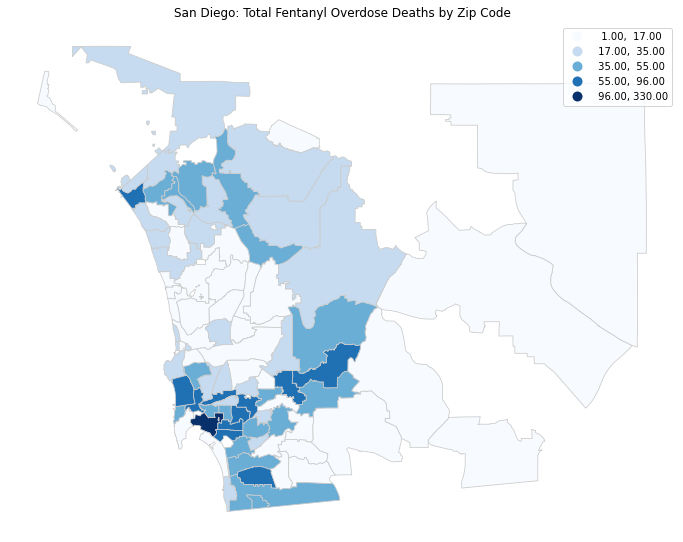

In [12]:
# Plot total deaths per zipcode
zips_deaths_sdf.plot(column='Deaths', cmap='Blues', linewidth=0.8, 
                     scheme='fisher_jenks', edgecolor='0.8', legend=True, 
                     figsize=(12, 10))
plt.title('San Diego: Total Fentanyl Overdose Deaths by Zip Code')
plt.axis('off')
plt.show()

In [14]:
zips_deaths_sdf.sort_values(by='Death_Per_1000', ascending=False)[:5][['ZIP','COMMUNITY','Population','Deaths','Death_Per_1000']]

,ZIP,COMMUNITY,Population,Deaths,Death_Per_1000
47,92055,Camp Pendleton,9684,NaN,NaN
121,92536,Aguanga,3737,NaN,NaN
113,92140,San Diego,2183,NaN,NaN
111,92136,San Diego,7014,NaN,NaN
25,92003,Bonsall,4781,NaN,NaN


Looking closer at the data we can see the top 3 zipcodes with the highest deaths rates are '92101', '920954', and '92108'. These zipcodes are going to be our study areas for our analysis and created a feature layer to analyze these areas further. 

<Item title:"Top 3 SD Zip Codes by Fentanly Death Rate" type:Feature Layer Collection owner:jpuray_UCSDOnline>
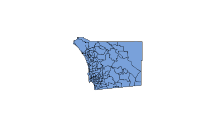

In [15]:
top_3_zips = gis.content.get("ae85a2596afc40ba98325de68bd55da3")
top_3_zips

# 9) Analysis

## Workflow 
1. Define candiate points
2. Define demand points
3. Define competitor points
4. Perform Relocation Allocation

## a) Define Candidate Points

For the next step in the analysis we must determine candidate points/locations (potential locations of where these new resources can be placed). We decided that new potential locations should be placed on areas that are similar to previous locations. 

To do this we utilized the San Diego Land Use dataset. If we look at the land use of the current locations we can use that to decide where new potential locations could be. 

To do this we utilized the San Diego Land Use dataset and spatially joined it with the feature layer that conatined the current locations. 

In [13]:
# Identifying Naloxone Vending Machines and their respective Land Use Area 


vending_machine_land = analysis.join_features(
    target_layer=vending_machines_fl, 
    join_layer=land_use_fl,
    spatial_relationship="completely contains",
    join_operation="JoinOneToOne",
    output_name = "Vending Machine Land Use")

# Identifying Naloxone Vending Machines and their respective Land Use Area 


vending_machine_land = analysis.join_features(
    target_layer=vending_machines_fl, 
    join_layer=land_use_fl,
    spatial_relationship="completely contains",
    join_operation="JoinOneToOne",
    output_name = "SD Fentanly Treatment Centers and Hospitals Land Use")

<Item title:"Vending_Machine_Land_Use" type:Feature Layer Collection owner:jpuray_UCSDOnline>
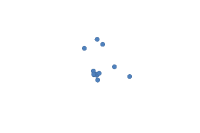

In [16]:
vending_machine_lu = gis.content.get("0a59e8d06f1b4530a003e3bbd5524314")
vending_machine_lu

<Item title:"SD Fentanly Treatment Centers and Hospitals Land Use" type:Feature Layer Collection owner:jpuray_UCSDOnline>
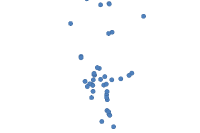

In [17]:
hospital_treatment_lu = gis.content.get("1e0a2b904fc0431a8b5ee26b5f569412")
hospital_treatment_lu

After joining the two feature layers together we can look at the type of land each resource is on.

In [18]:
# Getting Naloxone Vending Machine and Distribution Center Land codes
vending_machine_lu_sdf = vending_machine_lu.layers[0].query().sdf
vending_machine_lus = list(vending_machine_lu_sdf.lu.unique())

# Getting CA Bridge Treatment Center Land codes
hospital_treatment_lu_sdf = hospital_treatment_lu.layers[0].query().sdf
hospital_treatment_lus = list(hospital_treatment_lu_sdf.lu.unique())

print(f"Naloxone Vending Machine and Distribution Center Land use codes:\n{vending_machine_lus}\n")
print(f"CA Bridge and Treatment Center Land codes:\n{hospital_treatment_lus}")

Naloxone Vending Machine and Distribution Center Land use codes:
[5004, 5003, 6105, 7209, 1409, 9101, 2101, 6002, 1000, 5007, 1200]

CA Bridge and Treatment Center Land codes:
[6502, 6509, 6501, 1409, 5009, 5007, 6002, 1000, 5004, 1120, 6102, 5003, 2101, 4112]


<AxesSubplot:title={'center':'Self-Administered Treatment Location Land Use'}>

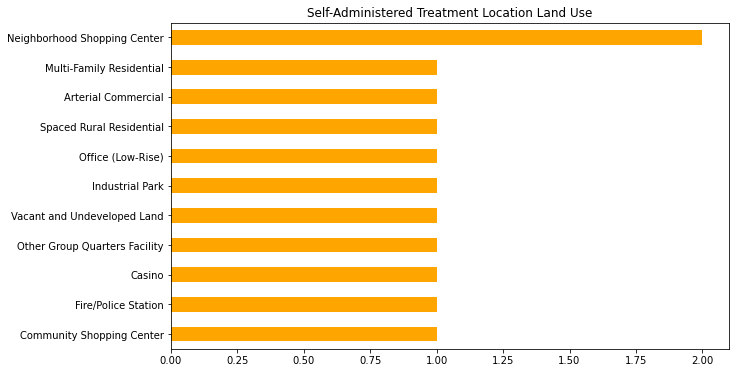

In [19]:
# Counts for Self-Administered Treatment Locations
vending_machine_lu_sdf["DESCRIPTIO"].value_counts().sort_values(ascending=True).plot(kind="barh",
                                                                                       title="Self-Administered Treatment Location Land Use",
                                                                                       figsize=(10,6),
                                                                                        color='Orange')

<AxesSubplot:title={'center':'Healthcare Facilities Land Use'}>

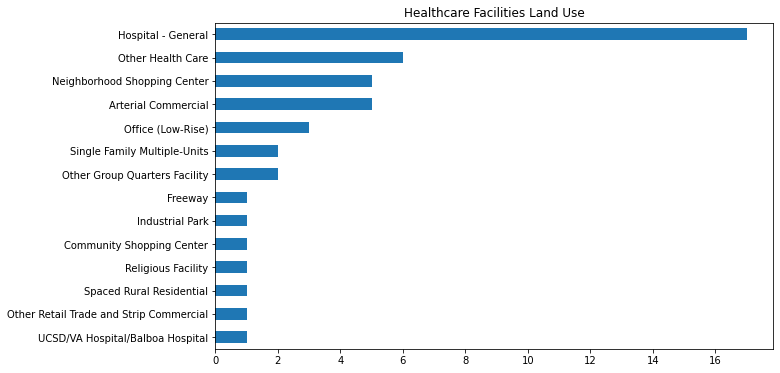

In [20]:
# Counts for Healthcare Facilities
hospital_treatment_lu_sdf["DESCRIPTIO"].value_counts().sort_values(ascending=True).plot(kind="barh",
                                                                                       title="Healthcare Facilities Land Use",
                                                                                       figsize=(10,6))

<Item title:"Top 3 SD Zip Codes by Fentanly Death Rate Land Use Centroids" type:Feature Layer Collection owner:jpuray_UCSDOnline>
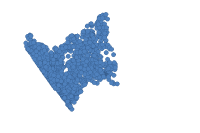

In [21]:
#For the next step in the analysis we must determine candidate points/locations (potential locations of where these new resources can be placed). We decided that new potential locations should be placed on areas that are similar to previous locations. 

lu_centroids_id = "09cce22407454ceba3804be5552515a0"
lu_centroids_fl = gis.content.get(lu_centroids_id)
lu_centroids_fl

This layer was created by getting the land use centroids only within the boundries of our study areas (top 3 zip codes by death rate). This was created because the land use data had too much data for us to load in and query so we only got the centroids from our areas of interest. 

Using the land use information we recieved above we will then query this layer to only get centroids with a similar land use. Which will then serve as our candidate points for the location allocation. 

## b) Define Demand Points

Next we will define the demand points. To **maximize attendance** to these new resources we will define our demand points as centroids of census tracts as this will serve as a proxy for where people are located within each zipcode.

To do this we did the follwing stesp in ArcGIS Map Viewer Analysis:
1. Geo-Enriched Census Tract data to get population (To weigh demand points later) 
2. Created centroids of Census Tracts in San Diego
3. Spatially joined these centroids with Zipcodes:
    - Target layer: Census Centroids
    - Join layer: San Diego Zips
    - Spatial relationship: Completley Within (Joined First Instance) 
    

The final result was the following feature layer which contains the centroids of each census tract in San Diego along with their respective zip codes and populations. 

<Item title:"SD_CENSUS_TRACT_2020_CENTROIDS_ZIPS" type:Feature Layer Collection owner:jpuray_UCSDOnline>
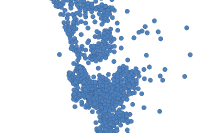

In [22]:
census_tract_centroids_fl = gis.content.get("49c64aacb2e243638aca42e6af4a5080")
census_tract_centroids_fl

## c) Define Competitor Points

Competitor points will be defined as current self-administered treatment sites and healthcare facilities. This approach aims to optimize our outreach to meet demand points by aligning with the existing facilities in our study areas.

In [23]:
# Competitor points are defined as follows:
naloxone_distribution_locations = gis.content.get("2d492ec4f078454b8f8e1b2fa20c498c")
hospitals_treatment_locations = gis.content.get("dd67aa51f0904bbab40adf37410682ee")

<Item title:"San Diego: Naloxone Distribution Locations" type:Feature Layer Collection owner:jpuray_UCSDOnline>
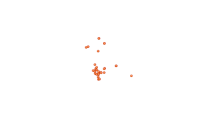

In [24]:
naloxone_distribution_locations

<Item title:"SD Fentanly Treatment Centers and Hospitals" type:Feature Layer Collection owner:jpuray_UCSDOnline>
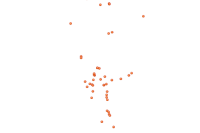

In [25]:
hospitals_treatment_locations

## d) Relocation Allocation

For location allocation we had to do one zipcode at a time as well as one resource category at a time because location allocation can only do 1000 points at a time. 

In [32]:
def location_allocation(candidates_fl, demand_fl,  competitors_fl, zipcode, lu_conditions):
    lu_conditions = " or ".join([f"lu='{lu}'" for lu in lu_conditions])
    query = f"ZIP={zipcode} and ({lu_conditions})"
    
    # Create facilities 
    candidate_facilities = candidates_fl.layers[0].query(where=query, as_df=False)
    demand_points = demand_fl.layers[0].query(where=f'ZIP={zipcode}', as_df=False)
    competitor_facilities = competitors_fl.layers[0].query(where="1=1", as_df=False)
    
    object_id_count = 0

    for f in candidate_facilities:
        object_id_count+=1
        f.attributes.update({"FacilityType":0})
    for f in competitor_facilities:
        object_id_count+=1
        f.attributes.update({"FacilityType":2, "OBJECTID":object_id_count})
    
    facilities_flist = []

    for ea in candidate_facilities:
        facilities_flist.append(ea)

    for ea in competitor_facilities:
        facilities_flist.append(ea)

    facilities = features.FeatureSet(facilities_flist)
    
    # Weigh demand points by popualtion
    for f in demand_points:
        tmp = f.get_value("2020 Total Population") 
        f.attributes.update({"Weight":tmp})
        
    result = network.analysis.solve_location_allocation(problem_type='Maximize Attendance',
                                                        travel_direction='Demand to Facility',
                                                        number_of_facilities_to_find='3',
                                                        measurement_transformation_model="Linear",
                                                        measurement_transformation_factor=2,
                                                        demand_points=demand_points,
                                                        facilities=candidate_facilities,
                                                        measurement_units='Minutes',
                                                        default_measurement_cutoff=5
                                                    )
    print(f'Analysis succeeded? {zipcode}'.format(result.solve_succeeded))
    result_df = result.output_facilities.sdf[['Name', 'FacilityType', 
                               'Weight','DemandCount', 'DemandWeight', 'TotalWeighted_Minutes', 'Total_Minutes']]
    return result, result_df 

In [33]:
# Function to display results 

# Define a function to display the output analysis results in a map
def visualize_locate_allocate_results(map_widget, solve_locate_allocate_result, zoom_level, symbol):
    # The map widget
    m = map_widget
    # The locate-allocate analysis result
    result = solve_locate_allocate_result
    
    # 1. Parse the locate-allocate analysis results
    # Extract the output data from the analysis results
    # Store the output points and lines in pandas dataframes
    demand_df = result.output_demand_points.sdf
    lines_df = result.output_allocation_lines.sdf

    # Extract the allocated demand points (pop) data.
    demand_allocated_df = demand_df[demand_df['DemandOID'].isin(lines_df['DemandOID'])]
    demand_allocated_fset = features.FeatureSet.from_dataframe(demand_allocated_df)

    # Extract the un-allocated demand points (pop) data.
    demand_not_allocated_df = demand_df[~demand_df['DemandOID'].isin(lines_df['DemandOID'])]
    if len(demand_not_allocated_df)>0:
        demand_not_allocated_fset = features.FeatureSet.from_dataframe(demand_not_allocated_df)

    # Extract the chosen facilities (candidate sites) data.
    facilities_df = result.output_facilities.sdf[['Name', 'FacilityType', 
                                                 'Weight','DemandCount', 'DemandWeight', 'SHAPE']]
    facilities_chosen_df = facilities_df[facilities_df['FacilityType'] == 3]
    facilities_chosen_fset = features.FeatureSet.from_dataframe(facilities_chosen_df)

    # 2. Define the map symbology
    # Allocation lines
    allocation_line_symbol_1 = {'type': 'esriSLS', 'style': 'esriSLSSolid',
                                'color': [255,255,255,153], 'width': 0.7}

    allocation_line_symbol_2 = {'type': 'esriSLS', 'style': 'esriSLSSolid',
                                'color': [0,255,197,39], 'width': 3}

    allocation_line_symbol_3 = {'type': 'esriSLS', 'style': 'esriSLSSolid',
                                'color': [0,197,255,39], 'width': 5}
    
    allocation_line_symbol_4 = {'type': 'esriSLS', 'style': 'esriSLSSolid',
                                'color': [0,92,230,39], 'width': 7}
    
    # Patient points within 90 minutes drive time to a proposed location.
    allocated_demand_symbol = {'type' : 'esriPMS', 'url' : 'https://maps.esri.com/legends/Firefly/cool/1.png',
                               'contentType' : 'image/png', 'width' : 26, 'height' : 26,
                               'angle' : 0, 'xoffset' : 0, 'yoffset' : 0}

    # Patient points outside of a 90 minutes drive time to a proposed location.
    unallocated_demand_symbol = {'type' : 'esriPMS', 'url' : 'https://maps.esri.com/legends/Firefly/warm/1.png',
                                 'contentType' : 'image/png', 'width' : 19.5, 'height' : 19.5,
                                 'angle' : 0, 'xoffset' : 0, 'yoffset' : 0}

    # Selected facilities
    selected_facilities_symbol = {"angle":0,"xoffset":0,"yoffset":0,"type":"esriPMS",
                                  "url":f"{symbol}",
                                  "contentType":"image/png","width":13,"height":13}
    
    # 3. Display the analysis results in the map
    
    # Zoom out to display all of the allocated census points.
    m.zoom = zoom_level
    
    # Display the locations of pop within the specified drive time to the selected site(s).
    m.draw(shape=demand_allocated_fset, symbol=allocated_demand_symbol)

    # Display the locations of pop outside the specified drive time to the selected site(s).
    if len(demand_not_allocated_df)>0:
        m.draw(shape = demand_not_allocated_fset, symbol = unallocated_demand_symbol)

    # Display the chosen site.
    m.draw(shape=facilities_chosen_fset, symbol=selected_facilities_symbol)
    m.draw(shape=result.output_allocation_lines, symbol=allocation_line_symbol_2)
    m.draw(shape=result.output_allocation_lines, symbol=allocation_line_symbol_1)

## Location Allocation: Naloxone Distribution Locations

In [35]:
# Results for self-aid treatment across the 3 zipcodes 
result1, result1_df= location_allocation(lu_centroids_fl, census_tract_centroids_fl, 
                              naloxone_distribution_locations, '92101',
                              vending_machine_lus)
result2, result2_df = location_allocation(lu_centroids_fl, census_tract_centroids_fl, 
                              naloxone_distribution_locations, '92054',
                              vending_machine_lus)
result3, result3_df = location_allocation(lu_centroids_fl, census_tract_centroids_fl, 
                              naloxone_distribution_locations, '92108',
                              vending_machine_lus)

Analysis succeeded? 92101
Analysis succeeded? 92054
Analysis succeeded? 92108


## Location Allocation: CA Bridge and Treament Centers

In [36]:
hospital_treatment_competitors = gis.content.get("dd67aa51f0904bbab40adf37410682ee")
first_aid_symbol = "https://static.arcgis.com/images/Symbols/Emergency-Management/Community-Events-First-Aid.png"

In [37]:
# Results for self-aid treatment across the 3 zipcodes 
result4, result4_df= location_allocation(lu_centroids_fl, census_tract_centroids_fl, 
                              hospital_treatment_competitors, '92101',
                              hospital_treatment_lus)
result5, result5_df = location_allocation(lu_centroids_fl, census_tract_centroids_fl, 
                              hospital_treatment_competitors, '92054',
                              hospital_treatment_lus)
result6, result6_df = location_allocation(lu_centroids_fl, census_tract_centroids_fl, 
                              hospital_treatment_competitors, '92108',
                              hospital_treatment_lus)

Analysis succeeded? 92101
Analysis succeeded? 92054
Analysis succeeded? 92108


# 10) Results & Summary

In [38]:
# Displaying results 

drug_symbol = "https://static.arcgis.com/images/Symbols/Emergency-Management/Law-Enforcement-Drug-Offense.png"
map1 = gis.map('San Diego CA')
map1

MapView(layout=Layout(height='400px', width='100%'))

**NOTE: To view please run cell below after running cell above so that the function can draw the results on the map**

The grey pill symbols represent the optimized locations for new naloxone distribution sites and the green plus symbols represent new potential healthcare facilities. Both resutls maximized on attendance so that we reach the most people in the area so that they can have access to these resources. 

In [39]:
# Plotting results in map1
visualize_locate_allocate_results(map1, result1, 8,drug_symbol)
visualize_locate_allocate_results(map1, result2, 8,drug_symbol)
visualize_locate_allocate_results(map1, result3, 8,drug_symbol)

# Plotting results in map1
visualize_locate_allocate_results(map1, result4, 8, first_aid_symbol)
visualize_locate_allocate_results(map1, result5, 8, first_aid_symbol)
visualize_locate_allocate_results(map1, result6, 8, first_aid_symbol)

In [40]:
# Saving Results in web map

item_properties = {
    "title": "Location Allocation of Fentanyl Resource in San Diego",
    "tags" : "Location Allocation",
    "snippet": "Location Allocation",
    "description": "A web map of Location Allocation for Naloxone Locations in San Diego"
}

item = map1.save(item_properties)
item

<Item title:"Location Allocation of Fentanyl Resource in San Diego" type:Web Map owner:jpuray_UCSDOnline>

Utilizing location allocation, we were able to create a reproducible way to find the most optimal locations to place Opioid-Fentanyl treatment resources in any chosen zip code in San Diego County. 

To demonstrate the reproducibility of our analysis, we were able to perform location allocation for the top three zip codes with the highest Fentanyl death rate. Through our location allocation analysis, we were able to find the most optimized locations to place Naloxone distribution centers as well as healthcare facilities used for Fentanyl overdose treatment and rehabilitation. These results are important because they help increase individuals’ access to no-cost Opioid treatment and healthcare. With self-administered treatment and healthcare facilities, we were able to maximize coverage at high risk areas.

This solution will significantly strengthen our community’s resilience against the Opioid crisis saving lives and helping those in need of rehabilitation. Especially within the homeless community where free healthcare is invaluable, this solution will hopefully help the homeless community reclaim their lives and reintegrate into society. 

# 11) Discussion

Our analysis findings closely align with those outlined in the 2021 San Diego Overdose Report. Like the report, we observed a notable increase in fentanyl overdose deaths, particularly evident from 2018 to the present. This underscores the critical need to enhance accessibility to resources and strategically place them in key locations to provide the most help to vulnerable groups. Moreover, our analysis revealed certain demographic groups, such as  males aged between 29 and 60, as being particularly vulnerable to Fentanyl overdose deaths.

An important tradeoff or limiation of our analysis is the spatial joining of zip code study areas with Census tracts to calculate demand points. We used the "intersects" spatial relationship to join these two, anticipating that it would yield a more Census tracts compared to other spatial join techniques. This decision was driven by the objective of maximizing the inclusion of Census tracts for analysis purposes. Additionally, due to performance issues with the land use dataset, we made the decision to utilize only the top three zip codes. Originally, we intended to incorporate the top 5-8 zip codes, but this adjustment was made due to the limitations of the relocation allocation solver. 

# 12) Conclusions and Future Work

Using location allocation we were able to asnwer and find the most optimal places fentanyl treatment facilities and naloxone distribution sites given the data available. However, the quality of our data was not the best and we are not confident that this is these truly are the best locations for the new resources, leaving us uncertain about the accuracy of our chosen locations for these new resources.

Our dataset identified fentanyl overdose death locations by zip codes, encompassing broad areas. Access to more detailed data, such as precise addresses or coordinates of these incidents, could enable us to define more targeted study areas for resource placement. Additionally, in assessing demand points, we relied solely on population data. Yet, exploratory data analysis and literature review suggest that certain demographic groups, such as African Americans, males, and individuals aged 20-40, are more affected by fentanyl overdoses. With access to more granular population data and demographic information, we could have refined our demand points, thereby optimizing resource placement to better serve those most affected.

Our approach holds potential applicability beyond fentanyl-related initiatives, extending to various location optimization endeavors. We aspire that our findings may guide the County of San Diego in strategically situating resources to combat the rise of fentanyl overdose deaths.
